In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [2]:
N_channel = 32
w_channel = 64
h_channel = 2048
def crosstalk(amplitude, array):
    X = np.zeros_like(array)
    
    pos_indices = np.arange(w_channel * h_channel).flatten()
    neg_indices = np.arange(w_channel * h_channel).reshape([h_channel, w_channel])
    neg_indices = neg_indices[:, ::-1].flatten()
    
    for j in range(N_channel):

        j_start = j * w_channel
        j_end = (j+1) * w_channel
        
        if (j & 0x1): #left to right for even, right to left for odd 
            readout_indices = neg_indices
        else:
            readout_indices = pos_indices
            
        for k in range(N_channel):
            k_start = k * w_channel
            k_end = (k+1) * w_channel
            
            k_array = array[:, k_start:k_end]
            X_kji = np.zeros_like(k_array.flatten())
            
            if (k & 0x1): #left to right for even, right to left for odd 
                i_indices = neg_indices
            else:
                i_indices = pos_indices
   
            dS_ki = np.diff(k_array.flatten()[i_indices])
            dS_ki = np.insert(dS_ki, 0, 0)

            X_kji[readout_indices] = amplitude[k, j] * dS_ki
            X[:, j_start: j_end] += X_kji.reshape(np.shape(k_array))
                       
    return X

In [3]:
data = fits.getdata('/Users/Briesemeister/Dropbox/ifu_sim_steph/A0_star_2.0_5.2_perfect_raw.fits')[:2048, :2048]
data *= 60000/data.max()

In [4]:
a = np.random.normal(0,.05, (32,32))
amplitude = a + a.T - 2*np.diag(a.diagonal())

In [5]:
X = crosstalk(amplitude, data)

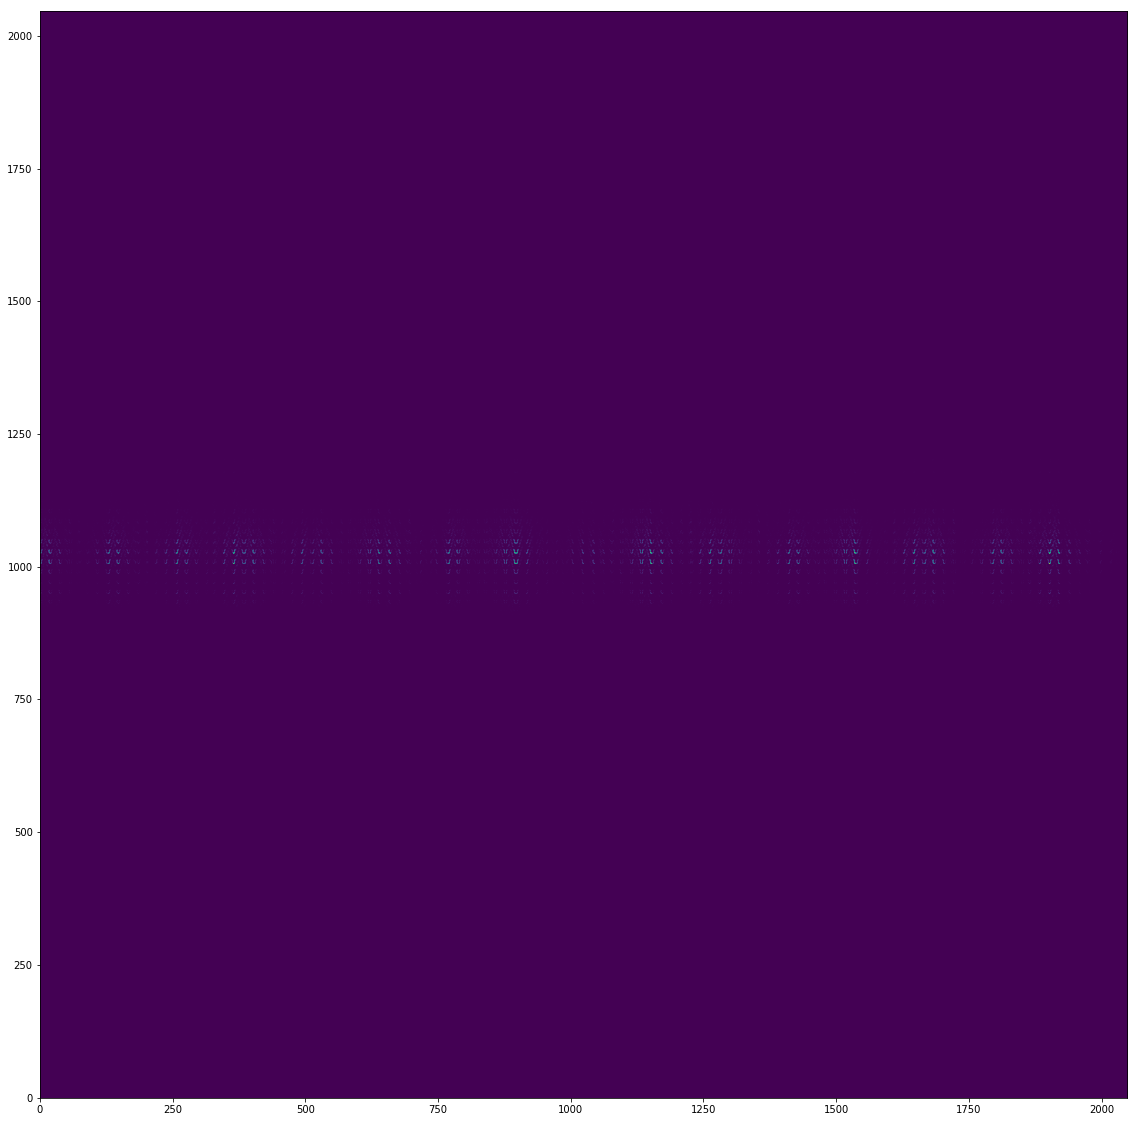

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(abs(X), origin='lower')

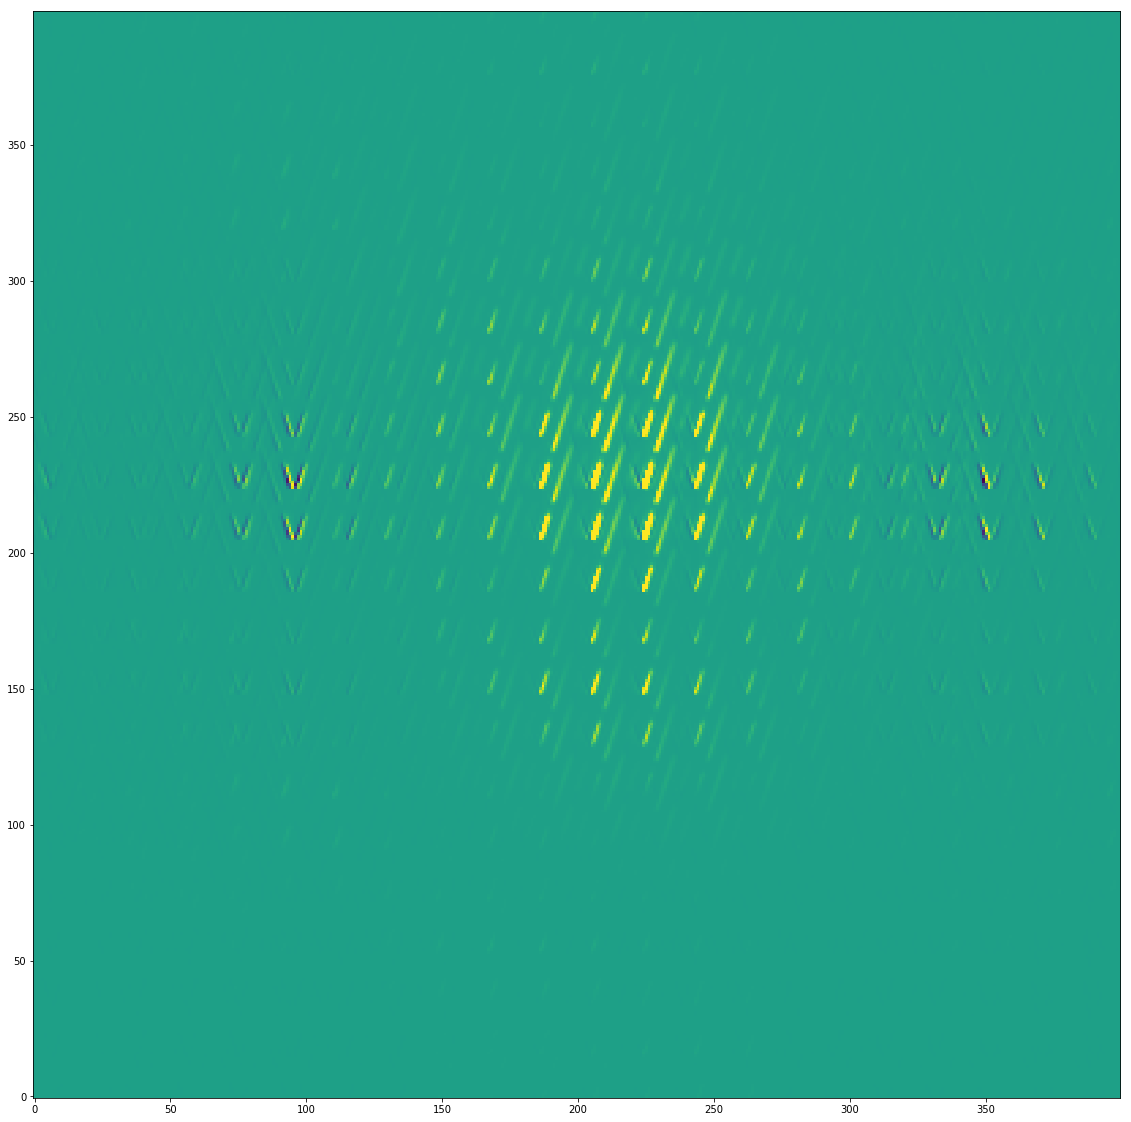

In [14]:
plt.figure(figsize=(20,20))
plt.imshow((data+X)[800:1200, 800:1200], origin='lower',vmax=5000)
